In [1]:
# Install required packages (only needs to be done once)
if (!requireNamespace("remotes", quietly = TRUE)) install.packages("remotes")
if (!requireNamespace("Seurat", quietly = TRUE)) install.packages("Seurat")
if (!requireNamespace("reticulate", quietly = TRUE)) install.packages("reticulate")
if (!requireNamespace("sceasy", quietly = TRUE)) remotes::install_github("cellgeni/sceasy")

# Load libraries
library(sceasy)
library(Seurat)
library(reticulate)

Loading required package: reticulate

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
# Install anndata in the Python environment R is using
py_install("anndata", pip = TRUE)
py_install("h5py", pip = TRUE)

In [1]:
# If using H5AD Convert h5ad to Seurat
# https://pankbase-data-v1.s3.us-west-2.amazonaws.com/analysis_resources/single_cell_objects/hpap_atac.h5ad
atac_obj <- sceasy::convertFormat(
  "hpap_atac.h5ad", 
  from = "anndata", 
  to = "seurat"
)

Loading required namespace: Seurat



In [5]:
# read RDS object
# https://pankbase-data-v1.s3.us-west-2.amazonaws.com/analysis_resources/single_cell_objects/hpap_atac.rds
atac_obj <- readRDS("/nfs/lab/parulk/hpap_atac.rds")

In [6]:
colnames(atac_obj@meta.data)

[1] "orig.ident"              "nCount_ATAC_peaks"      
 [3] "nFeature_ATAC_peaks"     "library"                
 [5] "sex"                     "condition"              
 [7] "ATAC_peaks_snn_res.1.5"  "seurat_clusters"        
 [9] "nCount_RNA"              "nFeature_RNA"           
[11] "nucleosome_signal"       "nucleosome_percentile"  
[13] "TSS.enrichment"          "TSS.percentile"         
[15] "reads_in_peaks"          "reads_in_promoters"     
[17] "tss_used"                "frac_reads_in_peaks"    
[19] "frac_reads_in_promoters" "frac_promoters_used"    
[21] "frac_mito_reads"         "frac_duplicated_reads"  
[23] "high.tss"                "nucleosome_group"       
[25] "sub_25_cluster"          "old.ident"              
[27] "sub_18_cluster"          "sub_20_cluster"         
[29] "old.ident.subcluster"    "AAB"                    
[31] "nCount_Final_Peaks"      "nFeature_Final_Peaks"   
[33] "Cell.Type"               "nCount_Unified_Peaks"   
[35] "nFeature_Unified_Peaks"

In [7]:
str(atac_obj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 4
  .. ..$ ATAC_peaks   :

Loading required package: Signac



Formal class 'ChromatinAssay' [package "Signac"] with 16 slots
  .. .. .. ..@ ranges            :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. .. ..@ values         : Factor w/ 24 levels "1","2","3","4",..: 1 10 11 12 13 14 15 16 17 18 ...
  .. .. .. .. .. .. .. ..@ lengths        : int [1:24] 42368 24329 23283 22982 14388 15135 15365 14570 17714 11994 ...
  .. .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. .. .. ..@ metadata       : list()
  .. .. .. .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. .. .. .. ..@ start          : int [1:481311] 100008394 10001052 100021995 100028726 100036810 100045247 100046897 100048300 100048775 100050158 ...
  .. .. .. .. .. .. .. ..@ width          : int [1:481311] 376 254 201 405 2457 280 732 368 392 247 ...
  .. .. .. .. .. .. .. ..@ NAMES          : NULL
  .. .

In [8]:
current_idents <- Idents(atac_obj)
table(current_idents)

current_idents
       Alpha         Beta       Acinar        Delta       Ductal   A Stellate 
       34257        27163        13360         5273        10368         1719 
     Schwann  Endothelial MUC5B Ductal        Gamma   Q Stellate       Immune 
         178         1704         1645         1350          357          463 

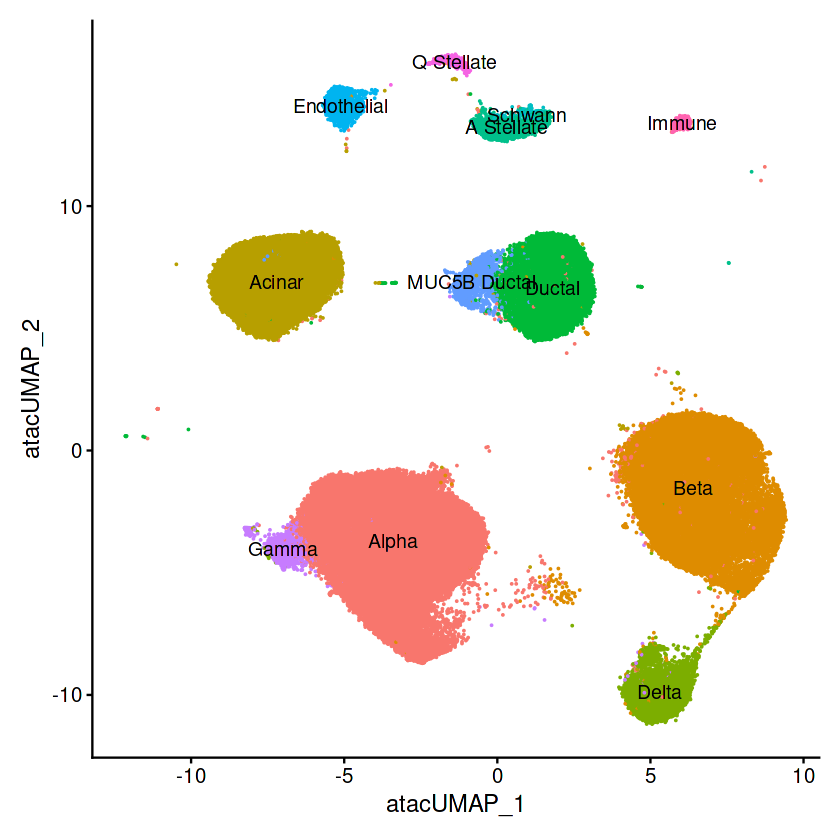

In [9]:
DimPlot(object = atac_obj, label = TRUE) + NoLegend()

In [10]:
covariant.ls = c("library", "sex", "condition")

In [12]:
library(ggplot2)

In [13]:
gg.ls = list()

# Library
    i = 1
    covariant = covariant.ls[i]
    Covariant.table = as.data.frame(table(atac_obj@active.ident, atac_obj$library))
    colnames(Covariant.table) = c("cluster", "covariant", "Freq")
    gg.ls[[i]] = ggplot(Covariant.table, aes(fill = covariant, y = Freq, x = cluster)) +
      theme_bw() +
      coord_flip() +
      geom_bar(position = position_fill(reverse = TRUE), stat = 'identity', color = 'black', size = 0.2) +
      labs(y= "\n Percentage", x = "", title = covariant) + 
      theme(axis.text = element_text(size = 25), axis.title = element_text(size = 25, face = "bold"),
                      axis.text.x = element_text(angle = 90),
                                 plot.title = element_text(size = 25, face = "bold", hjust = 0.5), legend.key.size = unit(3,"line"), legend.text=element_text(size=20))

# Sex
    i = 2
    covariant = covariant.ls[i]
    Covariant.table = as.data.frame(table(atac_obj@active.ident, atac_obj$sex))
    colnames(Covariant.table) = c("cluster", "covariant", "Freq")
    gg.ls[[i]] = ggplot(Covariant.table, aes(fill = covariant, y = Freq, x = cluster)) +
      theme_bw() +
      coord_flip() +
      geom_bar(position = position_fill(reverse = TRUE), stat = 'identity', color = 'black', size = 0.2) +
      labs(y= "\n Percentage", x = "", title = covariant) + 
      theme(axis.text = element_text(size = 25), axis.title = element_text(size = 25, face = "bold"),
                      axis.text.x = element_text(angle = 90),
                                 plot.title = element_text(size = 25, face = "bold", hjust = 0.5),legend.key.size = unit(2,"line"), legend.text=element_text(size=20))

# Condition
    i = 3
    covariant = covariant.ls[i]
    Covariant.table = as.data.frame(table(atac_obj@active.ident, atac_obj$condition))
    colnames(Covariant.table) = c("cluster", "covariant", "Freq")
    gg.ls[[i]] = ggplot(Covariant.table, aes(fill = covariant, y = Freq, x = cluster)) +
      theme_bw() +
      coord_flip() +
      geom_bar(position = position_fill(reverse = TRUE), stat = 'identity', color = 'black', size = 0.2) +
      labs(y= "\n Percentage", x = "", title = covariant) + 
      theme(axis.text = element_text(size = 25), axis.title = element_text(size = 25, face = "bold"),
                      axis.text.x = element_text(angle = 90),
                                 plot.title = element_text(size = 25, face = "bold",  hjust = 0.5), legend.key.size = unit(2,"line"), legend.text=element_text(size=20))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


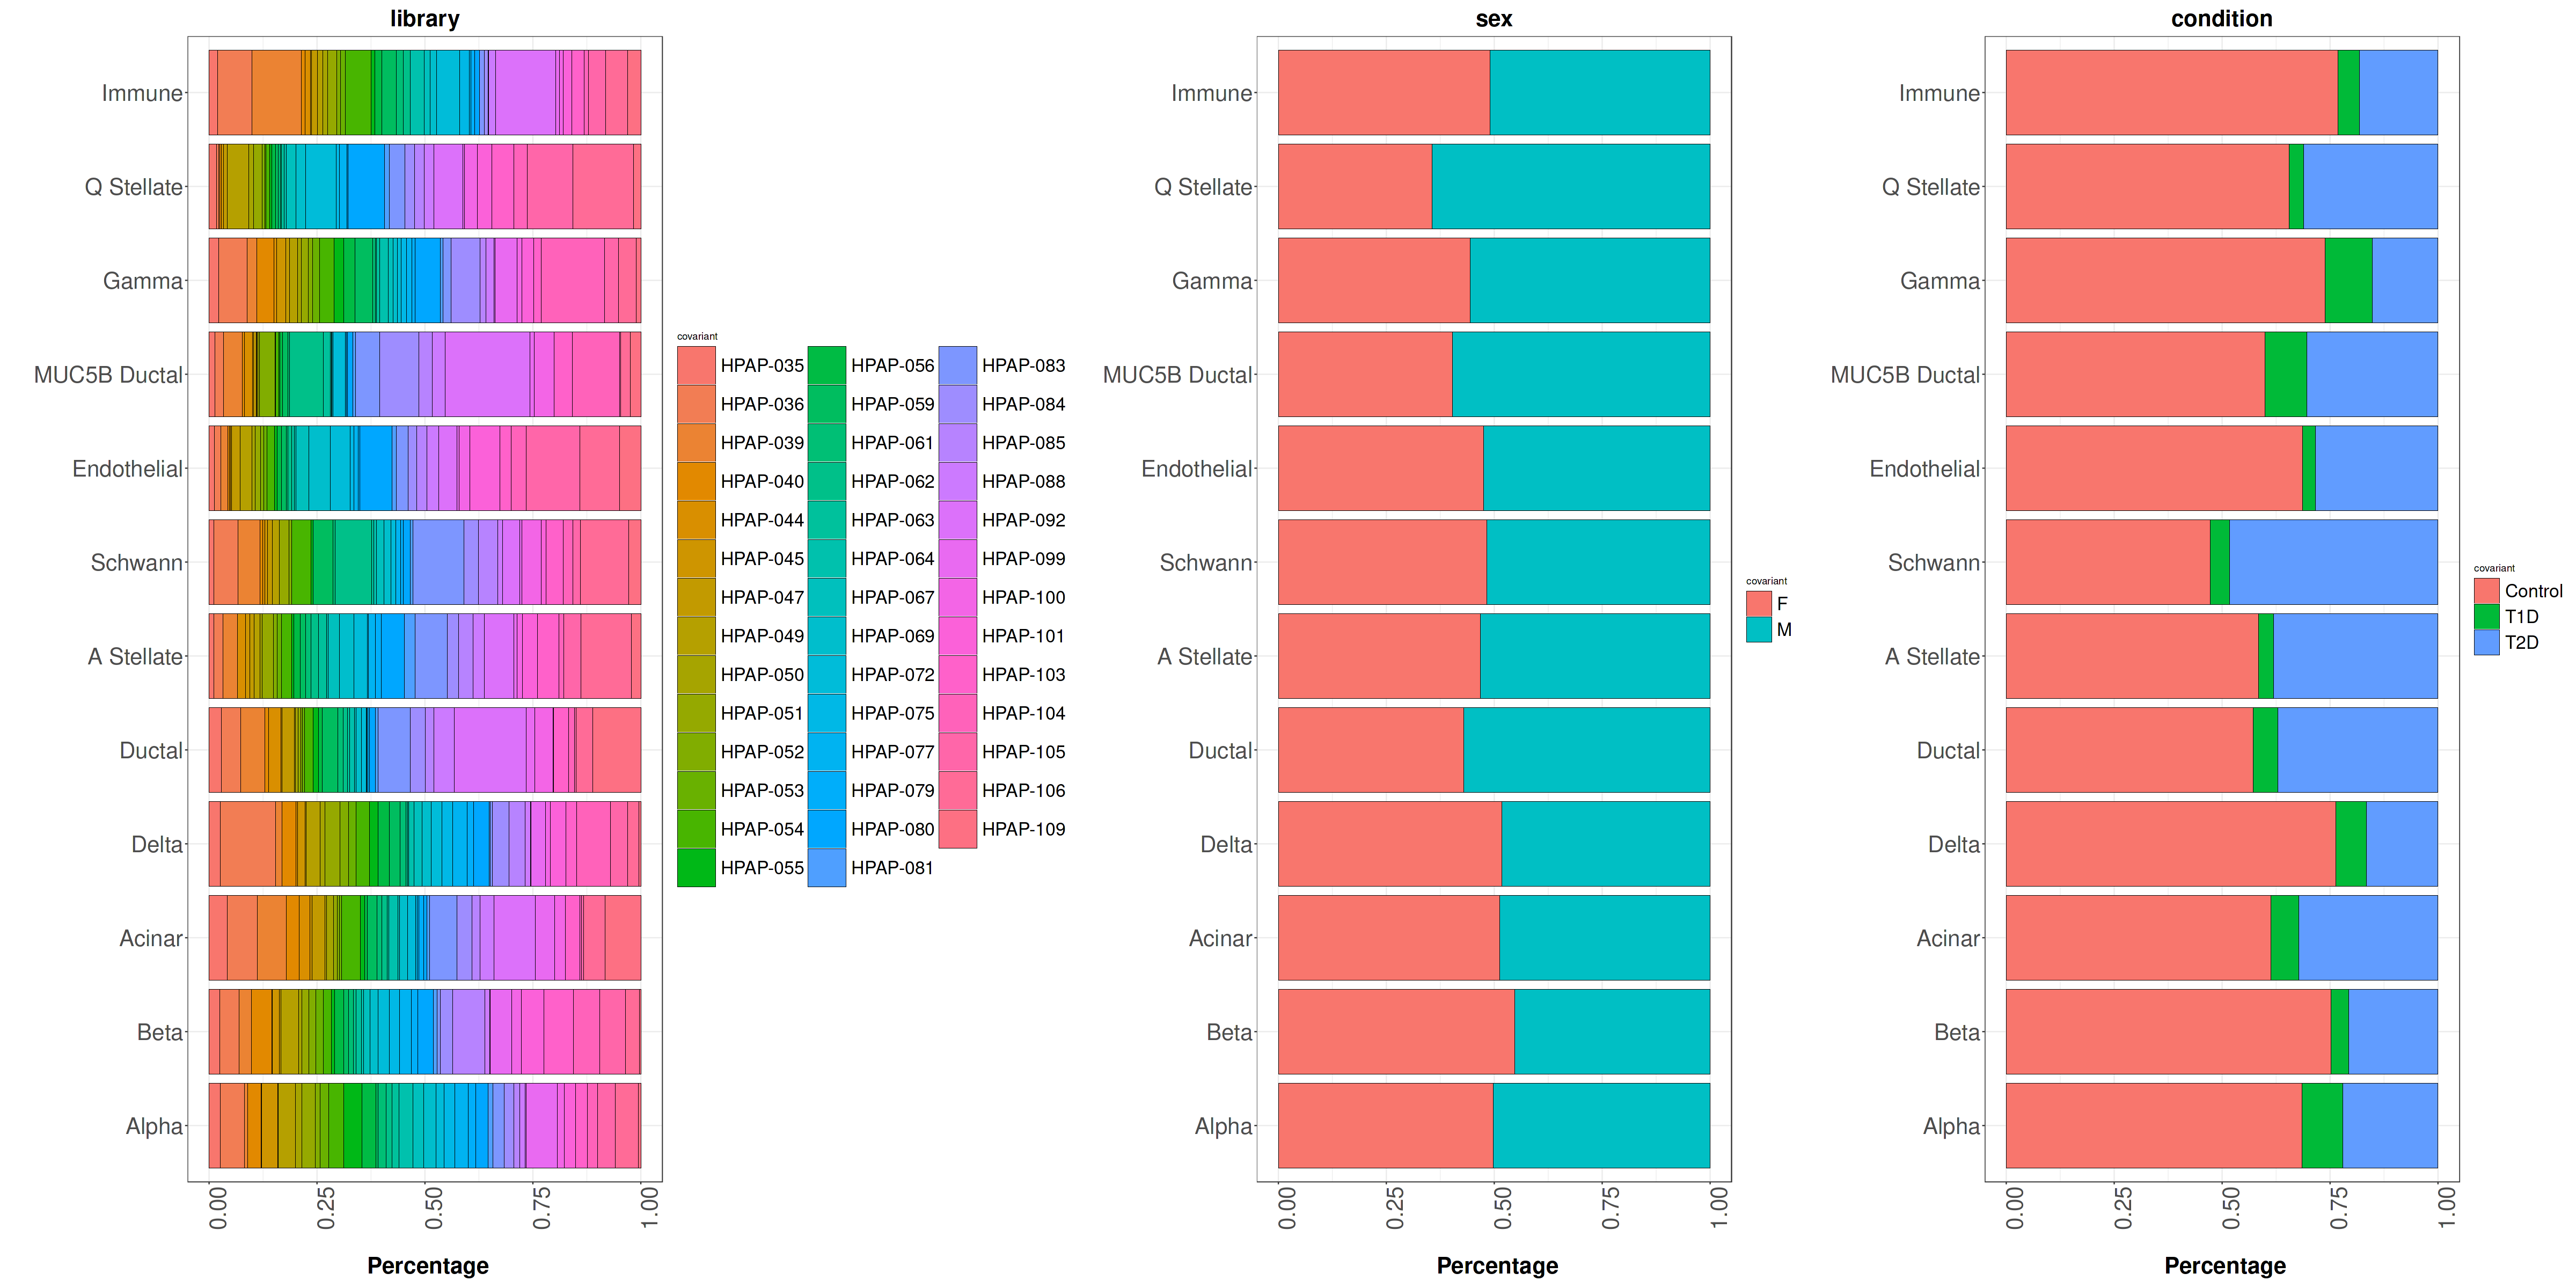

In [14]:
options(repr.plot.height = 20, repr.plot.width = 40)
cp <- gg.ls[[1]] + gg.ls[[2]] + gg.ls[[3]]
cp

In [16]:
library(ggpubr)
library(ggbreak)
library(gridExtra)
library(grid)
library(ggh4x)
library(ggplot2)
library(ggforce)

ggbreak v0.1.2

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846




In [18]:
library(tidyr)

In [20]:
# Load markers list
project.dir = "/nfs/lab/parulk/HPAP_scATAC/"
cell.markers = read.table("/nfs/lab/parulk/HPAP_scATAC/Cell.markers.txt", sep = ',', header = TRUE)

# Make it long, remove useless column and void markers
cell.markers <- cell.markers %>% gather(Key, marker, c(3:ncol(cell.markers)))
cell.markers = cell.markers[,-3]
cell.markers = cell.markers[cell.markers$marker != "", ]
head(cell.markers)

# Factorize columns - FIX HERE
# Assuming these are columns in your cell.markers dataframe:
cell.markersCompartment = factor(cell.markers$Compartment, levels = c("Endocrine cells", "Non-endocrine cells"))
cell.markersCellType = factor(cell.markers$CellType, levels = c("Beta", "Alpha", "Delta", "Gamma", "Ductal", "MUC5B Ductal", "Acinar", "Stellate", "Act. Stellate", "Q. Stellate", "Endothelial", "T Cell", "Schwann", "Macrophages"))

,Compartment,CellType,marker
,<chr>,<chr>,<chr>
1,Endocrine cells,Gamma,PPY
2,Endocrine cells,Alpha,GCG
3,Endocrine cells,Delta,SST
4,Endocrine cells,Beta,INS
5,Non-endocrine cells,Schwann,CDH19
6,Non-endocrine cells,Act Stellate,COL5A2


Warning message:
“The following requested variables were not found: NA”


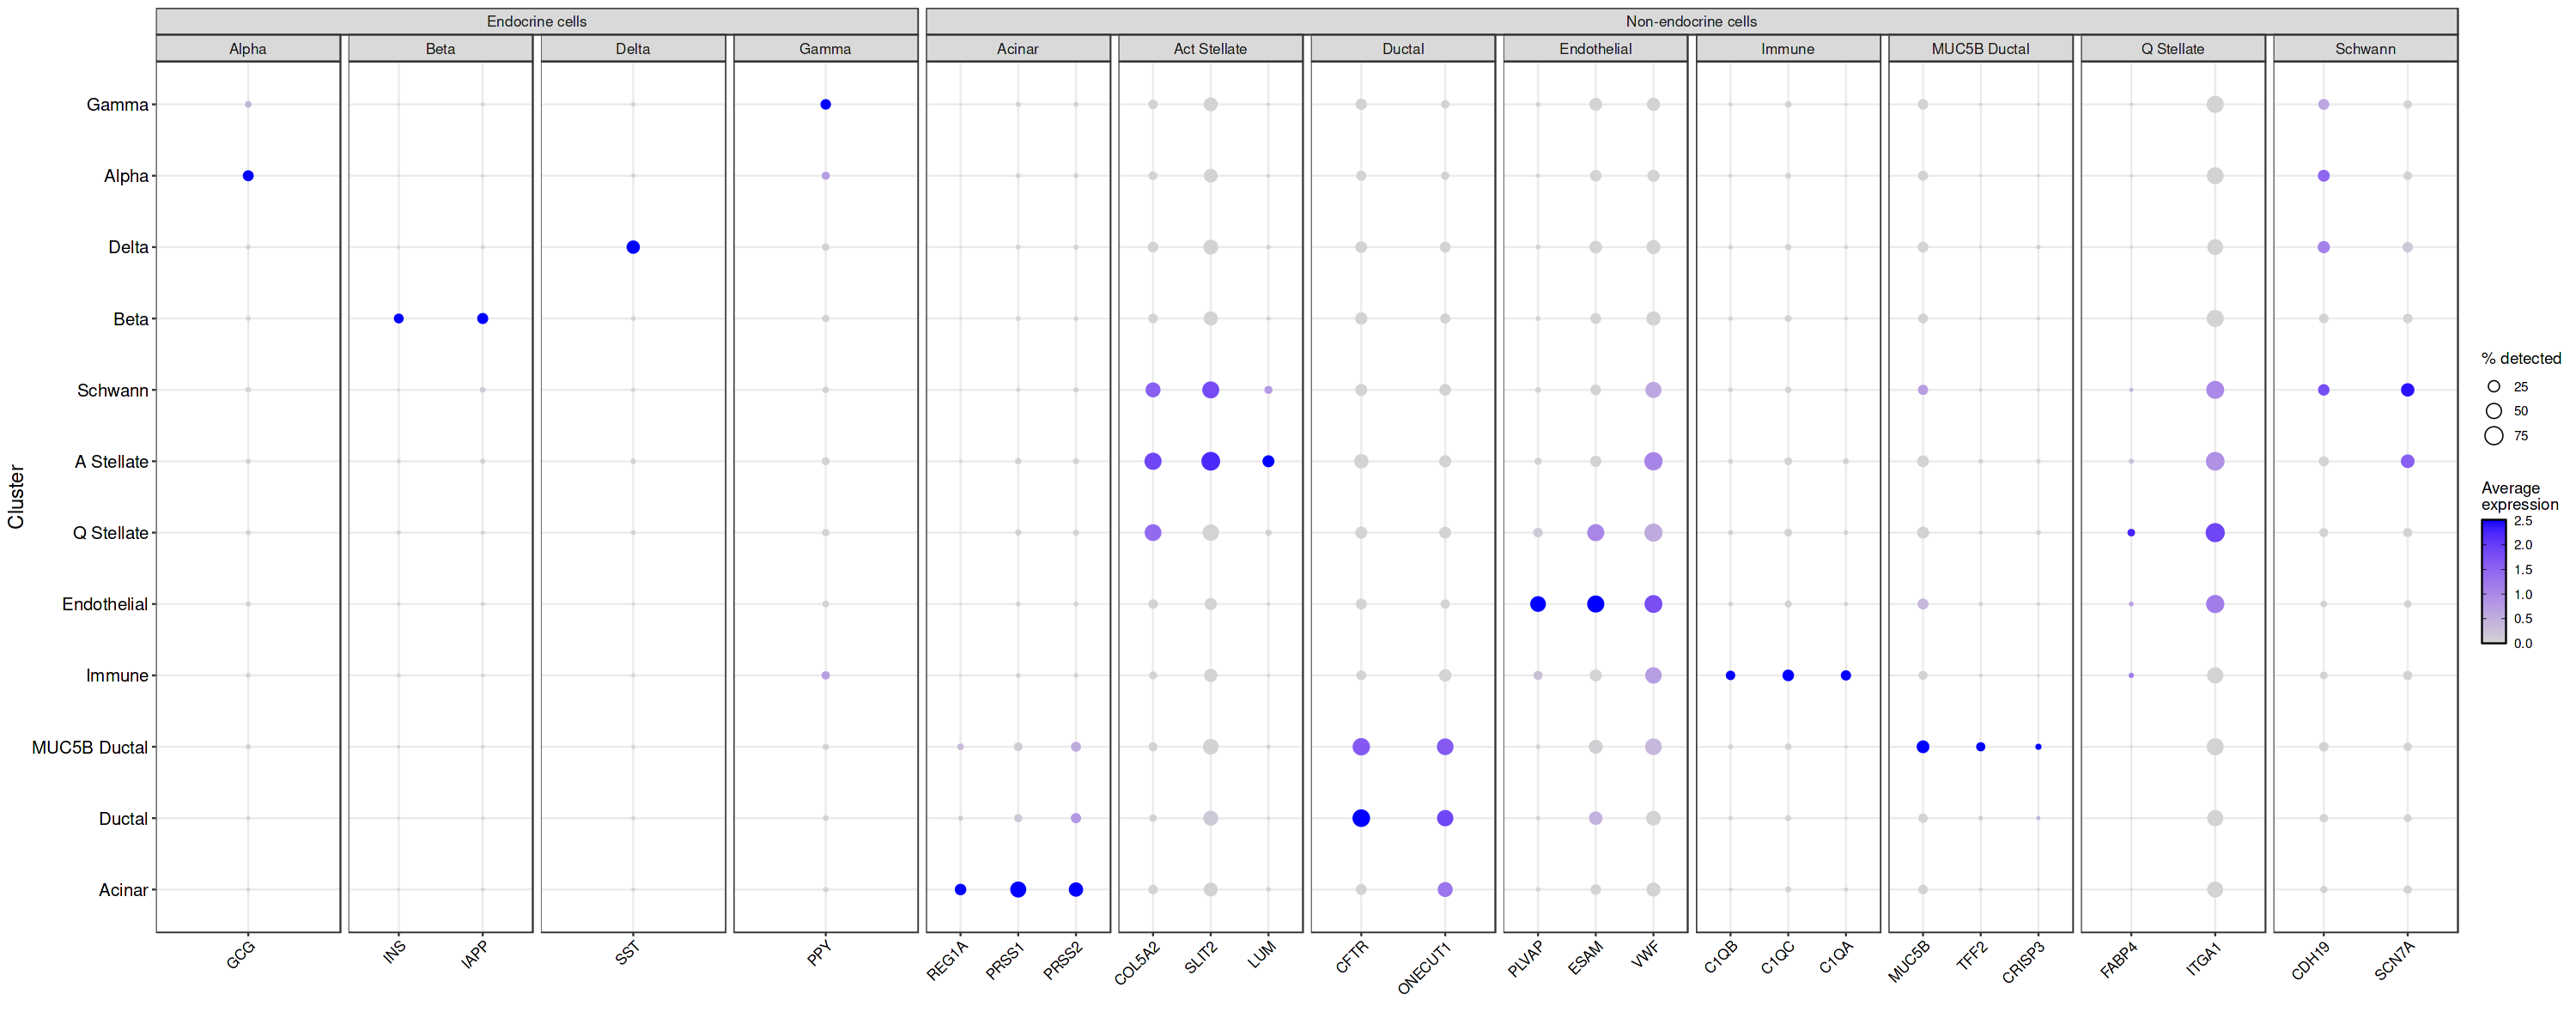

In [21]:
g = DotPlot(atac_obj, assay='RNA', features=cell.markers$marker, cluster.idents=TRUE, col.min=0) +
        theme(axis.text.x=element_text(angle=45, hjust=1)) + xlab('') + ylab('')
    meta_summary = g$data
    colnames(meta_summary)[3] = "marker"
    meta_summary = merge(meta_summary, cell.markers, by = "marker")

    options(repr.plot.width=25, repr.plot.height=10)
    figure <- ggplot(meta_summary, aes(x = marker, y = id)) +
      geom_point(aes(size = pct.exp, fill = avg.exp.scaled, stroke=NA),
                 shape = 21) +
      scale_size("% detected", range = c(0, 6)) +
      scale_fill_gradient(low = "lightgray", high = "blue",
                           guide = guide_colorbar(nbin = 200,
                                                  ticks.colour = "black", frame.colour = "black"),
                           name = "Average\nexpression") +
      ylab("Cluster") + xlab("") +
      theme_bw() +
      theme(axis.text = element_text(size = 100),
            axis.text.x = element_text(size = 10, angle = 45, hjust = 1, color = "black"),
            strip.text.x = element_text(size = 10),
            axis.text.y = element_text(size = 12, color = "black"),
            axis.title = element_text(size = 14)) +
facet_nested(~ Compartment + CellType, scales = "free")

figure

In [23]:
Assays(atac_obj)

[1] "ATAC_peaks"    "RNA"           "Final_Peaks"   "Unified_Peaks"

In [ ]:
# Access the gene activity data (normalized)
# Gene activity scores from ATAC-seq peaks using GeneActivity()
# https://stuartlab.org/signac/reference/geneactivity
# Gene activity scores are log-normalization, 
# Refer clustering_notebooks/03_Seurat_snATAC_peaks_Harmony_reducePCs_all_samples_final.ipynb
Creates a new assay called "RNA" to store these activity scores
Normalizes the gene activity scores using log-normalization
gene_activity_data <- GetAssayData(atac_obj, assay = "RNA", slot = "data")

In [25]:
head(gene_activity_data)

  [[ suppressing 34 column names ‘HPAP-035_AAACGAAAGAGAGTTT-1’, ‘HPAP-035_AAACGAAAGGGTAGTC-1’, ‘HPAP-035_AAACGAAGTAGAAAGG-1’ ... ]]



6 x 97837 sparse Matrix of class "dgCMatrix"
                                                                           
PLCXD1  . 1.017210 0.3300763 0.6784035 .        .        .        .        
GTPBP6  . 1.017210 0.5778197 .         1.142466 1.609621 0.367555 .        
PPP2R3B . .        .         1.0789054 .        .        0.367555 0.7596618
SHOX    . 0.632725 .         .         .        .        .        .        
CRLF2   . .        0.5778197 0.3956602 .        .        .        .        
CSF2RA  . .        .         .         .        .        .        .        
                                                                      
PLCXD1  0.2236760 .         . 1.2032243 .        .         .         .
GTPBP6  .         1.0787340 . 1.4128841 1.233607 .         0.9033497 .
PPP2R3B 0.2236760 .         . 1.2032243 .        0.7758403 .         .
SHOX    0.4063524 0.6782756 . .         .        .         .         .
CRLF2   .         .         . 0.5748964 1.233607 0.4613465 .        

In [ ]:
write.csv(as.matrix(gene_activity_data), file = "gene_activity_data.csv")

In [26]:
# Refer to clustering_notebooks/03_Seurat_snATAC_peaks_Harmony_reducePCs_all_samples_final.ipynb
peak_assay <- "ATAC_peaks"

In [27]:
# Get the peak count matrix
peak_counts <- GetAssayData(atac_obj, assay = peak_assay, slot = "counts")

In [28]:
peak_coords <- rownames(peak_counts)

In [29]:
peak_df <- data.frame(
  peak_id = peak_coords,
  row.names = peak_coords
)

In [30]:
peak_df$chromosome <- gsub("(.*)-.*-.*", "\\1", peak_df$peak_id)
peak_df$start <- as.numeric(gsub(".*-(.*)-.*", "\\1", peak_df$peak_id))
peak_df$end <- as.numeric(gsub(".*-.*-(.*)", "\\1", peak_df$peak_id))

In [31]:
peak_matrix_with_coords <- data.frame(
  chromosome = peak_df$chromosome,
  start = peak_df$start,
  end = peak_df$end,
  total_count = rowSums(peak_counts),
  row.names = peak_df$peak_id
)

In [32]:
head(peak_matrix_with_coords)

,chromosome,start,end,total_count
,<chr>,<dbl>,<dbl>,<dbl>
1-100008394-100008769,1,100008394,100008769,169
1-10001052-10001305,1,10001052,10001305,285
1-100021995-100022195,1,100021995,100022195,108
1-100028726-100029130,1,100028726,100029130,437
1-100036810-100039266,1,100036810,100039266,109155
1-100045247-100045526,1,100045247,100045526,470


In [ ]:
write.csv(peak_matrix_with_coords, "peak_counts_with_coordinates.csv")